Importing Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import GridSearchCV
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV
pd.set_option("display.max_rows", None, "display.max_columns", None)

Importing Data

In [2]:
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv', index_col='movieId')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv', index_col='movieId')

In [3]:
#Checking the shape of the  imported data
print ('small movies df shape:', movies_df.shape)
print ('small links df shape:' , links_df.shape)
print ('small ratings df shape:' , ratings_df.shape)
print ('small tags df shape:' , tags_df.shape)

small movies df shape: (9742, 3)
small links df shape: (9742, 2)
small ratings df shape: (100836, 4)
small tags df shape: (3683, 3)


Exploratory Data Analysis

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
#Merging movies_df and ratings_df dataframes into one 
movieratings_df = pd.merge(movies_df,ratings_df)

In [7]:
movieratings_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [8]:
movieratings_df.drop(columns=['timestamp','title','genres'], inplace = True)

In [9]:
movieratings_df.head()

,movieId,userId,rating
0,1,1,4.0
1,1,5,4.0
2,1,7,4.5
3,1,15,2.5
4,1,17,4.5


In [10]:
reader = Reader(rating_scale=(1, 5))

In [13]:
userRatings_data=Dataset.load_from_df(movieratings_df, reader)

In [14]:
userRatings_data

In [15]:
trainset, testset = train_test_split(userRatings_data, test_size=0.3)

In [16]:
print('Type trainset :',type(trainset),'\n')
print('Type testset :',type(testset))

Type trainset : <class 'surprise.trainset.Trainset'> 

Type testset : <class 'list'>


In [17]:
print(len(testset))
print(testset[0])

30251
(6867, 414, 4.5)


In [18]:
sim_cos = {'name':'cosine', 'user_based':False}
sim_cos

{'name': 'cosine', 'user_based': False}

In [19]:
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [20]:
basic.sim

array([[1.        , 0.98036224, 0.97624394, ..., 0.        , 0.        ,
        0.        ],
       [0.98036224, 1.        , 0.9677072 , ..., 1.        , 0.91323125,
        0.99388373],
       [0.97624394, 0.9677072 , 1.        , ..., 0.99641823, 0.96537783,
        0.97910717],
       ...,
       [0.        , 1.        , 0.99641823, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.91323125, 0.96537783, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.99388373, 0.97910717, ..., 0.        , 0.        ,
        1.        ]])

In [21]:
predictions = basic.test(testset)

In [22]:
predictions

[Prediction(uid=6867, iid=414, r_ui=4.5, est=3.6722062392217674, details={'actual_k': 6, 'was_impossible': False}),
 Prediction(uid=110102, iid=448, r_ui=3.5, est=3.739668344946463, details={'actual_k': 21, 'was_impossible': False}),
 Prediction(uid=230, iid=325, r_ui=4.0, est=3.191106332763595, details={'actual_k': 15, 'was_impossible': False}),
 Prediction(uid=7445, iid=573, r_ui=4.0, est=3.614353726283217, details={'actual_k': 25, 'was_impossible': False}),
 Prediction(uid=2231, iid=606, r_ui=4.5, est=3.9178283668506664, details={'actual_k': 23, 'was_impossible': False}),
 Prediction(uid=5454, iid=307, r_ui=1.5, est=3.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=434, iid=121, r_ui=3.0, est=3.149941693893026, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=4701, iid=480, r_ui=2.5, est=3.3753917060244545, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=2431, iid=432, r_ui=4.5, est=3.2001200648871526, details={'actual_k':

In [85]:
print(accuracy.rmse(predictions))

RMSE: 0.9776
0.9776407520975228


In [86]:
svd = SVD(n_factors=100, n_epochs=50, lr_all=0.007, reg_all=0.5)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.8857
0.8856887666956411


In [87]:
user_34_prediction = svd.predict(1, 1)
user_34_prediction

Prediction(uid=1, iid=1, r_ui=None, est=4.259239080950887, details={'was_impossible': False})

In [88]:
# mr_mean_df = pd.DataFrame(movieratings_df.groupby(['movieId'])['rating'].mean())
# mr_mean_df.head()

In [89]:
# mr_mean_df['rating_counts'] = movieratings_df.groupby(['movieId'])['rating'].count()
# ratingabove_3 = mr_mean_df[(mr_mean_df['rating']>=4) & (mr_mean_df['rating_counts']>=20)]
# ratingabove_3.sort_values('rating', ascending = False).head()

In [90]:
# user_movie_rating_table = movieratings_df.pivot_table(index='userId', columns='title', values='rating')
# user_movie_rating_table

In [91]:
plt.figure(figsize=(24,20))
mr_mean_df.hist(bins=10)
plt.title('Ratings Frequency')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

NameError: name 'mr_mean_df' is not defined

<Figure size 1728x1440 with 0 Axes>

In [ ]:
sns.displot(mr_mean_df, x="rating", binwidth=.25)

In [ ]:
sns.displot(mr_mean_df, x="rating_counts", binwidth=35)

<Figure size 576x432 with 0 Axes>

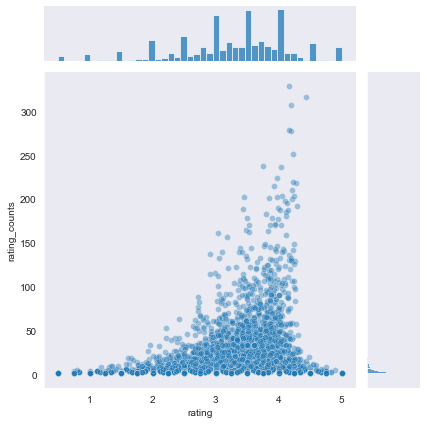

In [12]:
plt.figure(figsize=(8,6))
sns.jointplot(x='rating', y='rating_counts', data=mr_mean_df, alpha=0.4)

In [16]:
# algo = SVD()

In [22]:
# cross_validate(algo, mr_mean_df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [18]:
# from surprise import KNNWithMeans

# # To use item-based cosine similarity
# sim_options = {
#     "name": "cosine",
#     "user_based": False,  # Compute  similarities between items
# }
# algo = KNNWithMeans(sim_options=sim_options)